鄉鎮市區     0
建物型態     0
總價元      0
主建物面積    0
dtype: int64


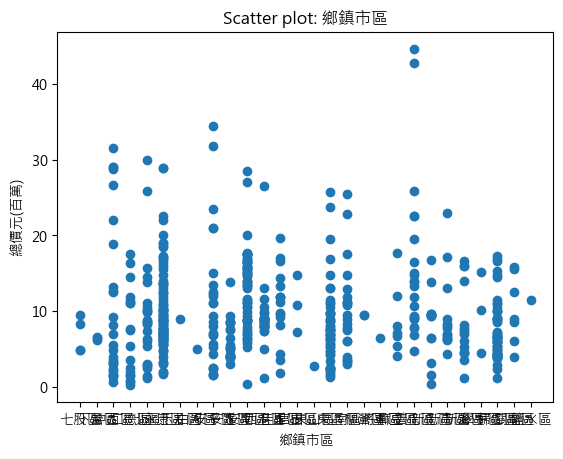

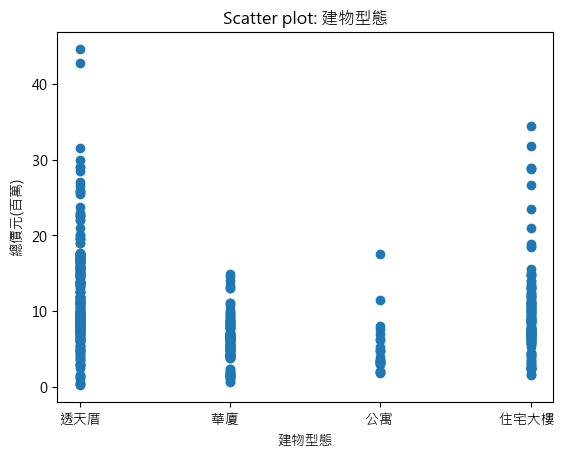

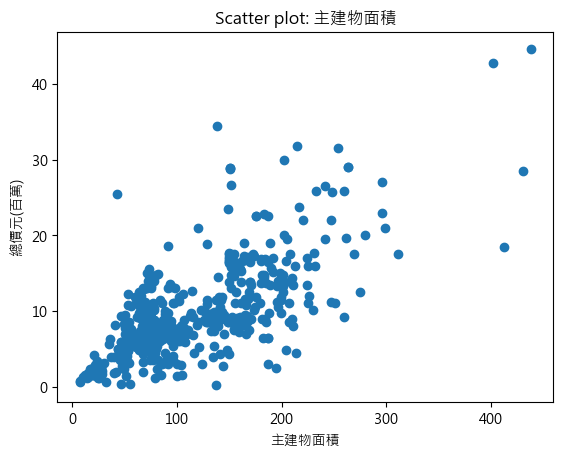

X.shape: (552, 3)
X.columns: Index(['鄉鎮市區', '建物型態', '主建物面積'], dtype='object')
X_processed: (552, 33)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
hit-rate(0.1): 0.3373493975903614
hit-rate(0.2): 0.5963855421686747
r2 score  : 0.6360611787668973


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import sklearn
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
data= pd.read_csv('123456.csv')
import warnings                             
warnings.filterwarnings('ignore')
from matplotlib.font_manager import FontProperties #顯示中文字
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

X = data.drop('總價元', axis=1)  # 總價是目標變量
y = data['總價元']

print(data.isnull().sum())

plot_lists = X.columns
def draw_scatter():
    for c in plot_lists:
        plt.scatter(data[c], (data['總價元'])) 
        plt.title('Scatter plot: ' + c)
        plt.xlabel(c)
        plt.ylabel('總價元(百萬)')
        plt.show()
draw_scatter()



cat_features = ['鄉鎮市區', '建物型態']  # 替換為實際的類別型特徵列名稱
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') #運用oneheatencoder把文字轉為數值
X_encoded = pd.DataFrame(encoder.fit_transform(X[cat_features]))
X_numerical = X.drop(cat_features, axis=1)
X_processed = pd.concat([X_numerical, X_encoded], axis=1)
X_processed.columns = X_processed.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)
print(f'X.shape: {X.shape}')
print(f'X.columns: {X.columns}')
print(f'X_processed: {X_processed.shape}')
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
y_test= y_test.to_frame() #將series轉為dataframe
y_train= y_train.to_frame()  
print(type(y_test))
print(type(y_train))
model = RandomForestRegressor() #套用隨機森林當作model
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 
y_pred= y_pred.reshape(166,1)  #reshape y_pred讓他跟y_test一樣

def hit_rate(y_pred, y_real, threshold=0.1):
    y_pred = np.array(y_pred)
    y_real = np.array(y_real)
    z = np.abs(y_pred - y_real) / y_real
    z = np.where(z <= threshold, 1, 0)
    return np.sum(z) / y_pred.shape[0]
print(f'hit-rate(0.1): {hit_rate(y_test, y_pred, 0.1)}')
print(f'hit-rate(0.2): {hit_rate(y_test, y_pred, 0.2)}')
from sklearn.metrics import r2_score
print("r2 score  : " + str(r2_score(y_test,  y_pred)))

import warnings                             
warnings.filterwarnings('ignore')
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
window = tk.Tk()
window.title("台南市房價預估")                             #視窗名稱
window.geometry("800x800")
window.resizable(1, 1)                                    #可開視窗最大化

title_label = tk.Label(window, text="台南市房價預測服務", font=("Helvetica", 30, "bold"))   #標題
title_label.pack()
# GUI元件和函數
label_feature1 = tk.Label(window, text="請輸入台南鄉鎮市區:",font=(20))
label_feature1.pack()
entry_feature1 = tk.Entry(window)
entry_feature1.pack()

label_feature2 = tk.Label(window, text="透天厝,華廈,住宅大樓,公寓:",font=(20))
label_feature2.pack()
entry_feature2 = tk.Entry(window)
entry_feature2.pack()

label_feature3 = tk.Label(window, text="主建物面積:",font=(20))
label_feature3.pack()
entry_feature3 = tk.Entry(window)
entry_feature3.pack()
cat_features = ['鄉鎮市區', '建物型態']
def predict():
    feature1 =entry_feature1.get() 
    feature2 =entry_feature2.get()
    feature3 =entry_feature3.get()
    # 將輸入的特徵值轉換為DataFrame並進行預測
    input_data = pd.DataFrame([[feature1, feature2, feature3]], columns=['鄉鎮市區', '建物型態','主建物面積'])
    input_encoded = pd.DataFrame(encoder.transform(input_data[cat_features]))
    input_numerical = input_data.drop(cat_features, axis=1)
    input_processed = pd.concat([input_numerical, input_encoded], axis=1)
    input_processed.columns = input_processed.columns.astype(str)
    predicted_price = model.predict(input_processed)
    
    messagebox.showinfo("預測結果", f"房價預測結果為: {predicted_price[0]}百萬元")

button_predict = tk.Button(window, text="預測", command=predict,font=(20))
button_predict.pack()

def show_image():
    global photo  
    image_path = "pict.jpg"  #圖片的路徑
    image = Image.open(image_path)
    image = image.resize((400, 400), Image.ANTIALIAS)  # 調整圖片大小
    photo = ImageTk.PhotoImage(image)

    label_image.configure(image=photo)  # 更新圖片
label_image = tk.Label(window)
label_image.pack()
show_image()





def clear_screen():
    window.destroy()  # 關閉視窗並結束應用程式
button_clear = tk.Button(window, text="結束此程式", command=clear_screen)
button_clear.pack()
# 運行GUI
window.mainloop()